In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from IPython.display import Image
import pydotplus

In [6]:
df = pd.read_csv("./Dataset/Breast Cancer Dataset.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
df.shape

(569, 32)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave_points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [11]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [12]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [13]:
df.duplicated().sum()

np.int64(0)

In [16]:
df = df.drop(['id'], axis=1)

In [17]:
df['diagnosis'] = df['diagnosis'].map({"M":1, "B":0})

In [19]:
X = df.drop("diagnosis",axis=1)
y = df['diagnosis']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [21]:
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X_train, y_train)
model

DecisionTreeClassifier(criterion='entropy')

In [24]:
import math

def entropy(column):
    counts = column.value_counts()
    probabilities = counts / len(column)
    return -sum(probabilities*probabilities.apply(math.log2))

def conditional_entropy(data, X, target):
    feature_values = data[X].unique()
    weighted_entropy = 0
    for value in feature_values:
        subset = data[data[feature]==value]
        weighted_entropy += (len(subset)/ len(data)) * entropy(subset[target])

    return weighted_entropy

def information_gain(data, X, target):
    total_entropy = entropy(data[target])
    feature_conditional_entropy = conditional_entropy(data, X, target)
    return total_entropy - feature_conditional_entropy

In [25]:
for feature in X:
    ig = information_gain(df, feature, 'diagnosis')
    print(f"Information Gain for {feature}: {ig}")

Information Gain for radius_mean: 0.8607815854835991
Information Gain for texture_mean: 0.8357118798482908
Information Gain for perimeter_mean: 0.9267038614138748
Information Gain for area_mean: 0.9280305529818247
Information Gain for smoothness_mean: 0.7761788341876101
Information Gain for compactness_mean: 0.9091291689709926
Information Gain for concavity_mean: 0.9350604299589776
Information Gain for concave_points_mean: 0.9420903069361305
Information Gain for symmetry_mean: 0.735036638169654
Information Gain for fractal_dimension_mean: 0.8361770160635639
Information Gain for radius_se: 0.9337337383910278
Information Gain for texture_se: 0.8642965239721755
Information Gain for perimeter_se: 0.9315454914704012
Information Gain for area_se: 0.925377169845925
Information Gain for smoothness_se: 0.9350604299589776
Information Gain for compactness_se: 0.9231889229252984
Information Gain for concavity_se: 0.9280305529818247
Information Gain for concave_points_se: 0.8585933385629725
Informa

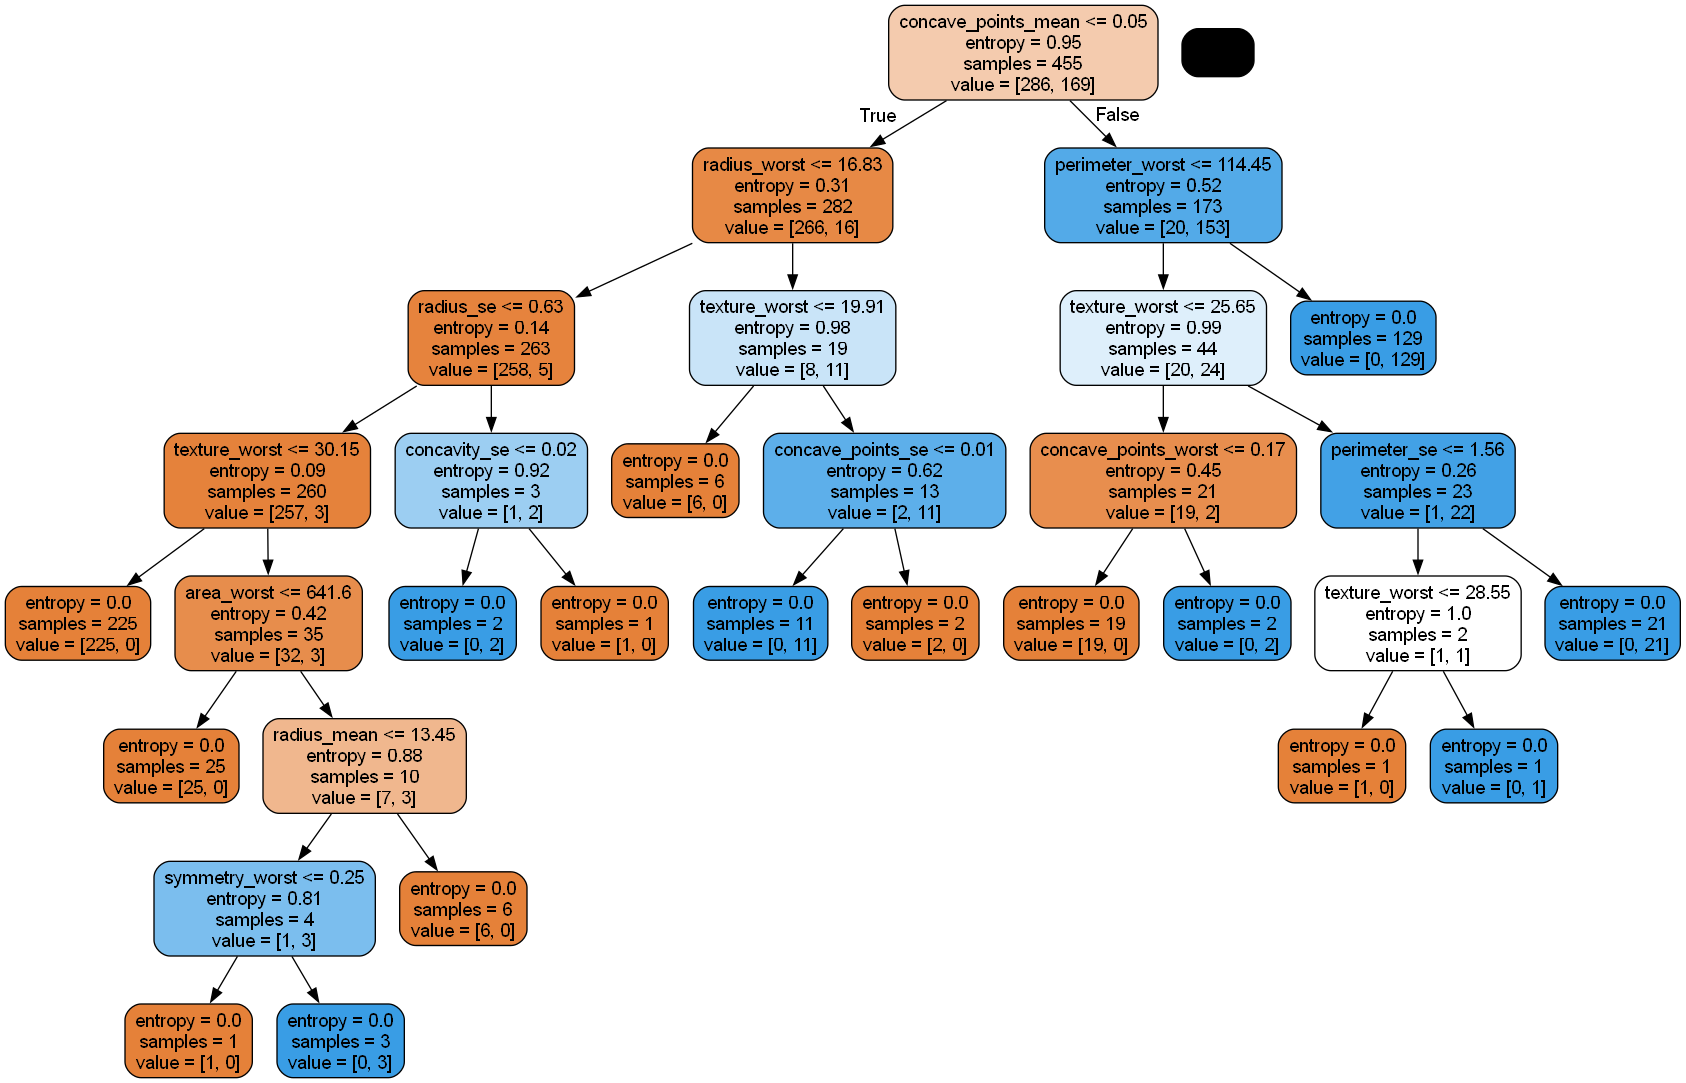

In [26]:
dot_data = export_graphviz(model, out_file=None, feature_names=X_train.columns, rounded=True, proportion=False, precision=2, filled=True)

graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())

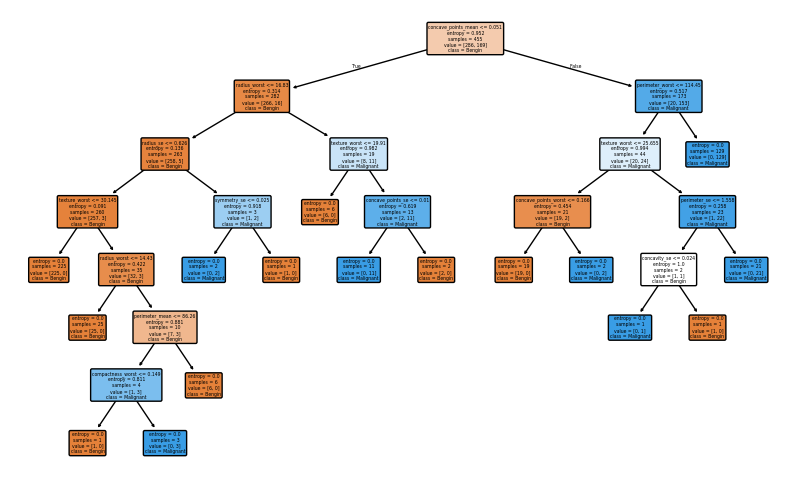

In [20]:
plt.figure(figsize=(10,6))
plot_tree(model, filled=True, rounded=True, feature_names=X.columns, class_names=["Bengin", "Malignant"])
plt.show()

In [28]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

In [29]:
accuracy = accuracy_score(y_test, y_pred)*100
classification_rep = classification_report(y_test, y_pred)

print(accuracy)
print(classification_rep)

93.85964912280701
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        71
           1       0.95      0.88      0.92        43

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114

